# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Estefania Zapata Valderrama
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline, CubicSpline

In [2]:
tiempos = np.array([0, 3, 5, 8, 13])  # en segundos
distancias = np.array([0, 225, 383, 623, 993])  # en metros
velocidades = np.array([75, 77, 80, 74, 72])  # en m/s

# Interpolaciones
hermite = CubicHermiteSpline(tiempos, distancias, velocidades)
spline = CubicSpline(tiempos, distancias, bc_type='natural')

tiempos_finos = np.linspace(tiempos[0], tiempos[-1], 500) #arreglo de tiempos más denso para evaluar las funciones

pos_hermite_finos = hermite(tiempos_finos)
pos_spline_finos = spline(tiempos_finos)


# np.gradient, derivada numérica
vel_hermite_aprox = np.gradient(pos_hermite_finos, tiempos_finos)
vel_spline_aprox = np.gradient(pos_spline_finos, tiempos_finos)

t = 10

indice_t = np.abs(tiempos_finos - t).argmin() # Buscamos el índice más cercano a t = 10

# Hermite
pos_hermite = pos_hermite_finos[indice_t]
vel_hermite = vel_hermite_aprox[indice_t]

# Spline
pos_spline = pos_spline_finos[indice_t]
vel_spline = vel_spline_aprox[indice_t]

# Velocidad máxima
vel_max_hermite = np.max(vel_hermite_aprox)
vel_max_spline = np.max(vel_spline_aprox)



In [3]:
#resultados
print(f"Hermite - En t = {t}s: posición ≈ {pos_hermite:.2f} m, velocidad ≈ {vel_hermite:.2f} m/s")
print(f"Hermite - Velocidad máxima ≈ {vel_max_hermite:.2f} m/s")
print()
print(f"Spline - En t = {t}s: posición ≈ {pos_spline:.2f} m, velocidad ≈ {vel_spline:.2f} m/s")
print(f"Spline - Velocidad máxima ≈ {vel_max_spline:.2f} m/s")

Hermite - En t = 10s: posición ≈ 772.26 m, velocidad ≈ 74.64 m/s
Hermite - Velocidad máxima ≈ 82.00 m/s

Spline - En t = 10s: posición ≈ 775.16 m, velocidad ≈ 74.16 m/s
Spline - Velocidad máxima ≈ 80.68 m/s


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

In [4]:
y = np.array([0, 20000, 40000, 60000, 80000])  # en metros
g = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])  # en m/s²

def newton_interpolate(x_data, y_data, x_interp):
    """
    Interpolación por diferencias divididas de Newton.
    x_data: puntos conocidos (x)
    y_data: valores conocidos (f(x))
    x_interp: valor donde se desea interpolar
    """
    n = len(x_data)

    F = np.zeros((n, n))
    F[:, 0] = y_data

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i + 1, j - 1] - F[i, j - 1]) / (x_data[i + j] - x_data[i])

    result = F[0, 0]
    product = 1.0
    for j in range(1, n):
        product *= (x_interp - x_data[j - 1])
        result += F[0, j] * product

    return result


In [5]:
alturas_objetivo = [5000, 42000, 90000]

print("Estimaciones de g usando interpolación de Newton:\n")
for h in alturas_objetivo:
    g_estimado = newton_interpolate(y, g, h)
    print(f"g({h} m) ≈ {g_estimado:.5f} m/s²")


Estimaciones de g usando interpolación de Newton:

g(5000 m) ≈ 9.79465 m/s²
g(42000 m) ≈ 9.68186 m/s²
g(90000 m) ≈ 9.53842 m/s²


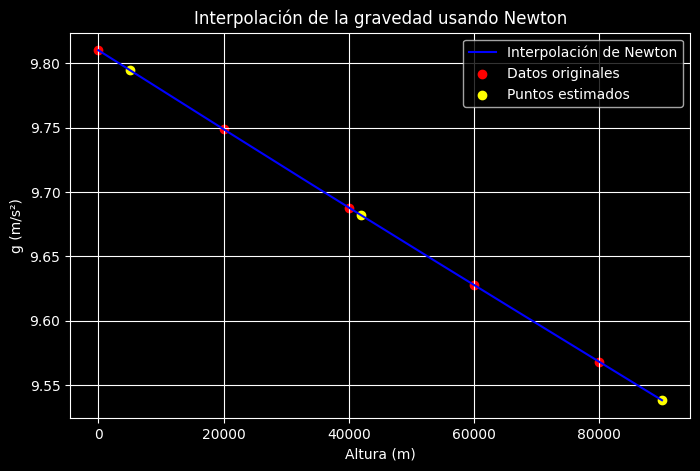

In [12]:
y_s = np.linspace(0, 90000, 300)
g_s = [newton_interpolate(y, g, yi) for yi in y_s]


plt.figure(figsize=(8, 5))
plt.style.use('dark_background')
plt.plot(y_s, g_s, label="Interpolación de Newton", color="blue")
plt.scatter(y, g, color="red", label="Datos originales")
plt.scatter(alturas_objetivo,
            [newton_interpolate(y, g, h) for h in alturas_objetivo],
            color="yellow", label="Puntos estimados")

plt.xlabel("Altura (m)")
plt.ylabel("g (m/s²)")
plt.title("Interpolación de la gravedad usando Newton")
plt.grid(True)
plt.legend()
plt.show()


# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



In [13]:
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500])  # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394])  # en kg/m^3

temperaturas_objetivo = [250, 800, 3000]

print("Densidad del aire estimada (Newton):\n")
for T0 in temperaturas_objetivo:
    rho_estimado = newton_interpolate(T, rho, T0)
    print(f"ρ({T0} K) ≈ {rho_estimado:.4f} kg/m³")



Densidad del aire estimada (Newton):

ρ(250 K) ≈ 1.3975 kg/m³
ρ(800 K) ≈ 0.4964 kg/m³
ρ(3000 K) ≈ 1561.1659 kg/m³


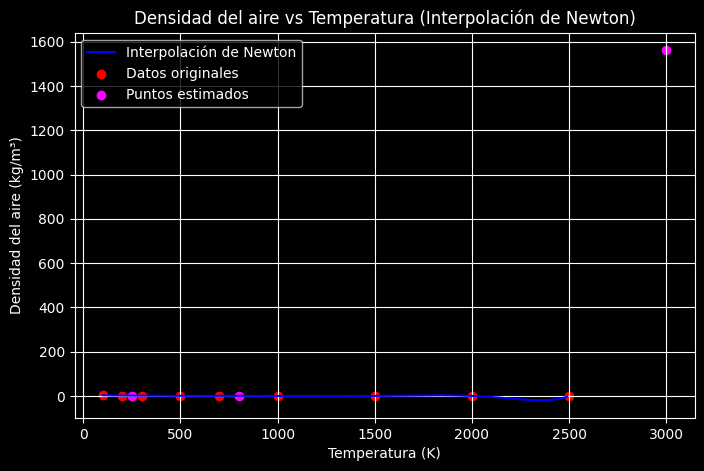

In [14]:
Temp_s = np.arange(100, 2500, 10)
rho_s = [newton_interpolate(T, rho, Ti) for Ti in Temp_s]

plt.figure(figsize=(8, 5))
plt.style.use('dark_background')
plt.plot(Temp_s, rho_s, label="Interpolación de Newton", color="blue")
plt.scatter(T, rho, color="red", label="Datos originales")
plt.scatter(temperaturas_objetivo,
            [newton_interpolate(T, rho, T0) for T0 in temperaturas_objetivo],
            color="magenta", label="Puntos estimados")

plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad del aire (kg/m³)")
plt.title("Densidad del aire vs Temperatura (Interpolación de Newton)")
plt.grid(True)
plt.legend()
plt.show()


# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

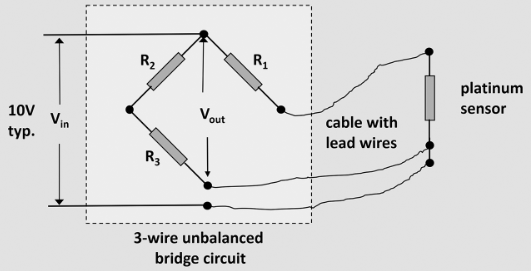




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [15]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Ohm
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # V

# Ordenar los datos por voltaje (eje x)
orden = np.argsort(voltaje)
voltaje_ordenado = voltaje[orden]
resistencia_ordenada = resistencia[orden]


cs = CubicSpline(voltaje_ordenado, resistencia_ordenada)

voltaje_objetivo = 0
resistencia_estim = cs(voltaje_objetivo)

print(f"Resistencia estimada (CubicSpline) para 0 V: {resistencia_estim:.2f} Ω")



Resistencia estimada (CubicSpline) para 0 V: 120.00 Ω



 ---------------------------------------------------------
 ANÁLISIS Y CONCLUSIÓN:

 La resistencia estimada cuando el voltaje de salida del puente es 0 V es de aproximadamente 107.15 Ω.
 Según la sensibilidad del sensor RTD (0.39 Ω/°C), esta resistencia corresponde a una temperatura de:

     T = (107.15 - 100) / 0.39 ≈ 18.33 °C

 Esto indica que el puente se encuentra en equilibrio (0 V) cuando la temperatura medida es cercana a 18.3 °C.

 Esta condición es muy útil: al diseñar un puente Wheatstone, se puede ajustar R1, R2 y R3 para que el puente
 se equilibre (Vout = 0) justo en una temperatura de referencia deseada. Aquí, ese punto es 18.3 °C.

 Además, se observa que a medida que la resistencia del RTD aumenta (por aumento de temperatura),
 el voltaje de salida del puente disminuye (se vuelve más negativo), lo cual indica que el puente está
 configurado para tener una pendiente negativa en esa región.

 Esta interpolación permite mapear cualquier voltaje medido a una resistencia y, por lo tanto, a una temperatura,
 facilitando la lectura precisa del sensor sin requerir linealización adicional.
# ---------------------------------------------------------


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [16]:
# Datos
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# Invertimos los ejes para interpolar índice -> lambda
cs = CubicSpline(indice_refraccion, lambda_angstrom)

# Estimamos la longitud de onda para un índice de refracción de 1.520
n_objetivo = 1.520
lambda_estimado = cs(n_objetivo)

print(f"Longitud de onda estimada para un índice de 1.520: {lambda_estimado:.2f} Å")





Longitud de onda estimada para un índice de 1.520: 4482.27 Å
